## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
df = pd.read_csv('Hotel_Booking_EDA.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data Preparation

## Handle missing values

In [6]:
df = df.drop(columns=['company'])

In [7]:
df.dropna(subset=['children'], inplace=True)

In [8]:
mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)

In [9]:
df['agent'].fillna(9, inplace=True)

## Convert columns values

In [10]:
df['distribution_channel'].replace(['TA/TO'], 'Undefined', inplace=True)

In [11]:
mapping = {'Undefined': 'No Meal', 'BB': 'Breakfast', 'FB': 'Full Board', 'HB': 'Half Board'}
df['meal'].replace(mapping, inplace=True)

## Changing datatypes

In [12]:
#Turn columns into int data type
df['children'].astype(int)
df['agent'].astype(int)

#Turn column into datetime data type
pd.to_datetime(df['reservation_status_date'])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

## Handle duplicates

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

## Create new columns by combining other columns

In [14]:
#create total night coloumn

df['total_night'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']

#convert month name to number then create new arrival data coloumn by combining year month date

df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month
df['arrival_date'] = pd.to_datetime(dict(year=df.arrival_date_year, month=df.arrival_date_month, day=df.arrival_date_day_of_month))

## Drop unnecessary columns

In [15]:
coloumns_to_drop = ['stays_in_weekend_nights','stays_in_week_nights','booking_changes','deposit_type','adr','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number']
df.drop(columns = coloumns_to_drop, inplace=True)

# Descriptive Analysis and Correlations

## Correlation heatmap

C:\Users\Admin\AppData\Local\Temp\ipykernel_5432\3067901911.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=5)


Text(0.03, 0.93, 'Correlation Between Variables')

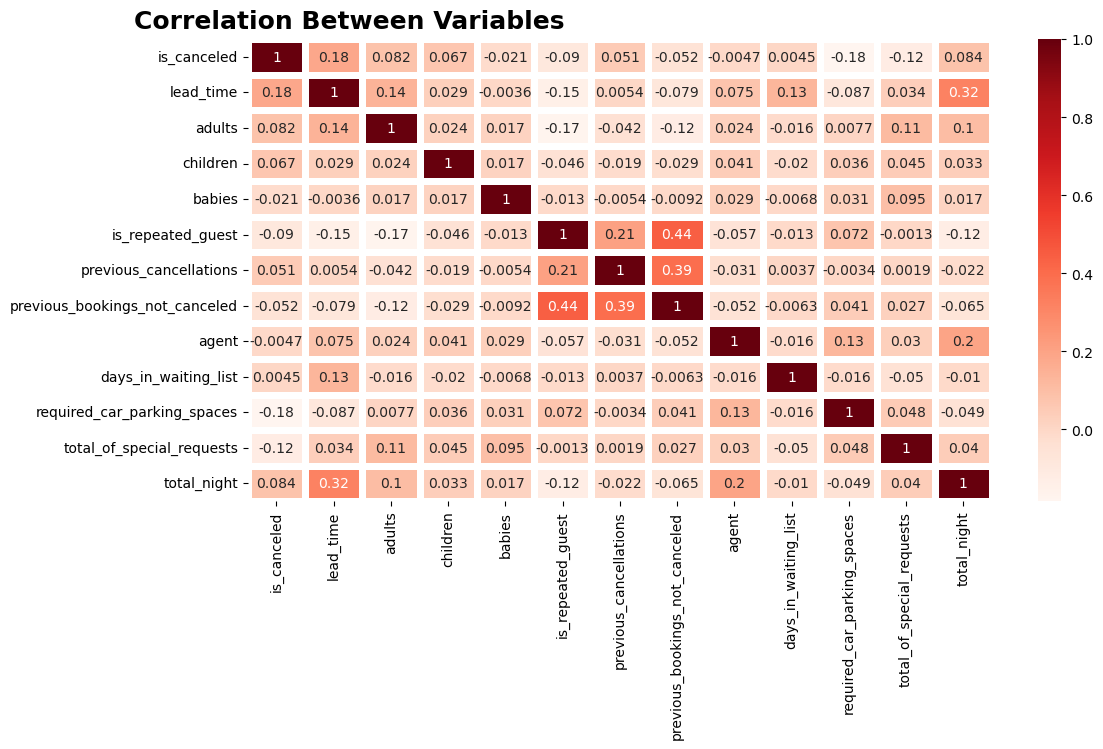

In [16]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy', x=0.03, y=0.93, ha="left", fontsize='18', fontfamily='sans-serif', color="black")

## Export the file to csv

In [17]:
df.to_csv('Result_Hotel_Booking_EDA.csv', index=False)